# MC: Understand the simulator status

In [1]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import uproot

from lcio_checks.mc.simulation import add_simulation_info, plot_simulation_info
from lcio_checks.util import config, load_or_make

f = uproot.open(f"{config['data_dir']}/P2f_z_eehiq.root")["MyLCTuple"]
mc = f.arrays(filter_name="mc*", entry_stop=-1)

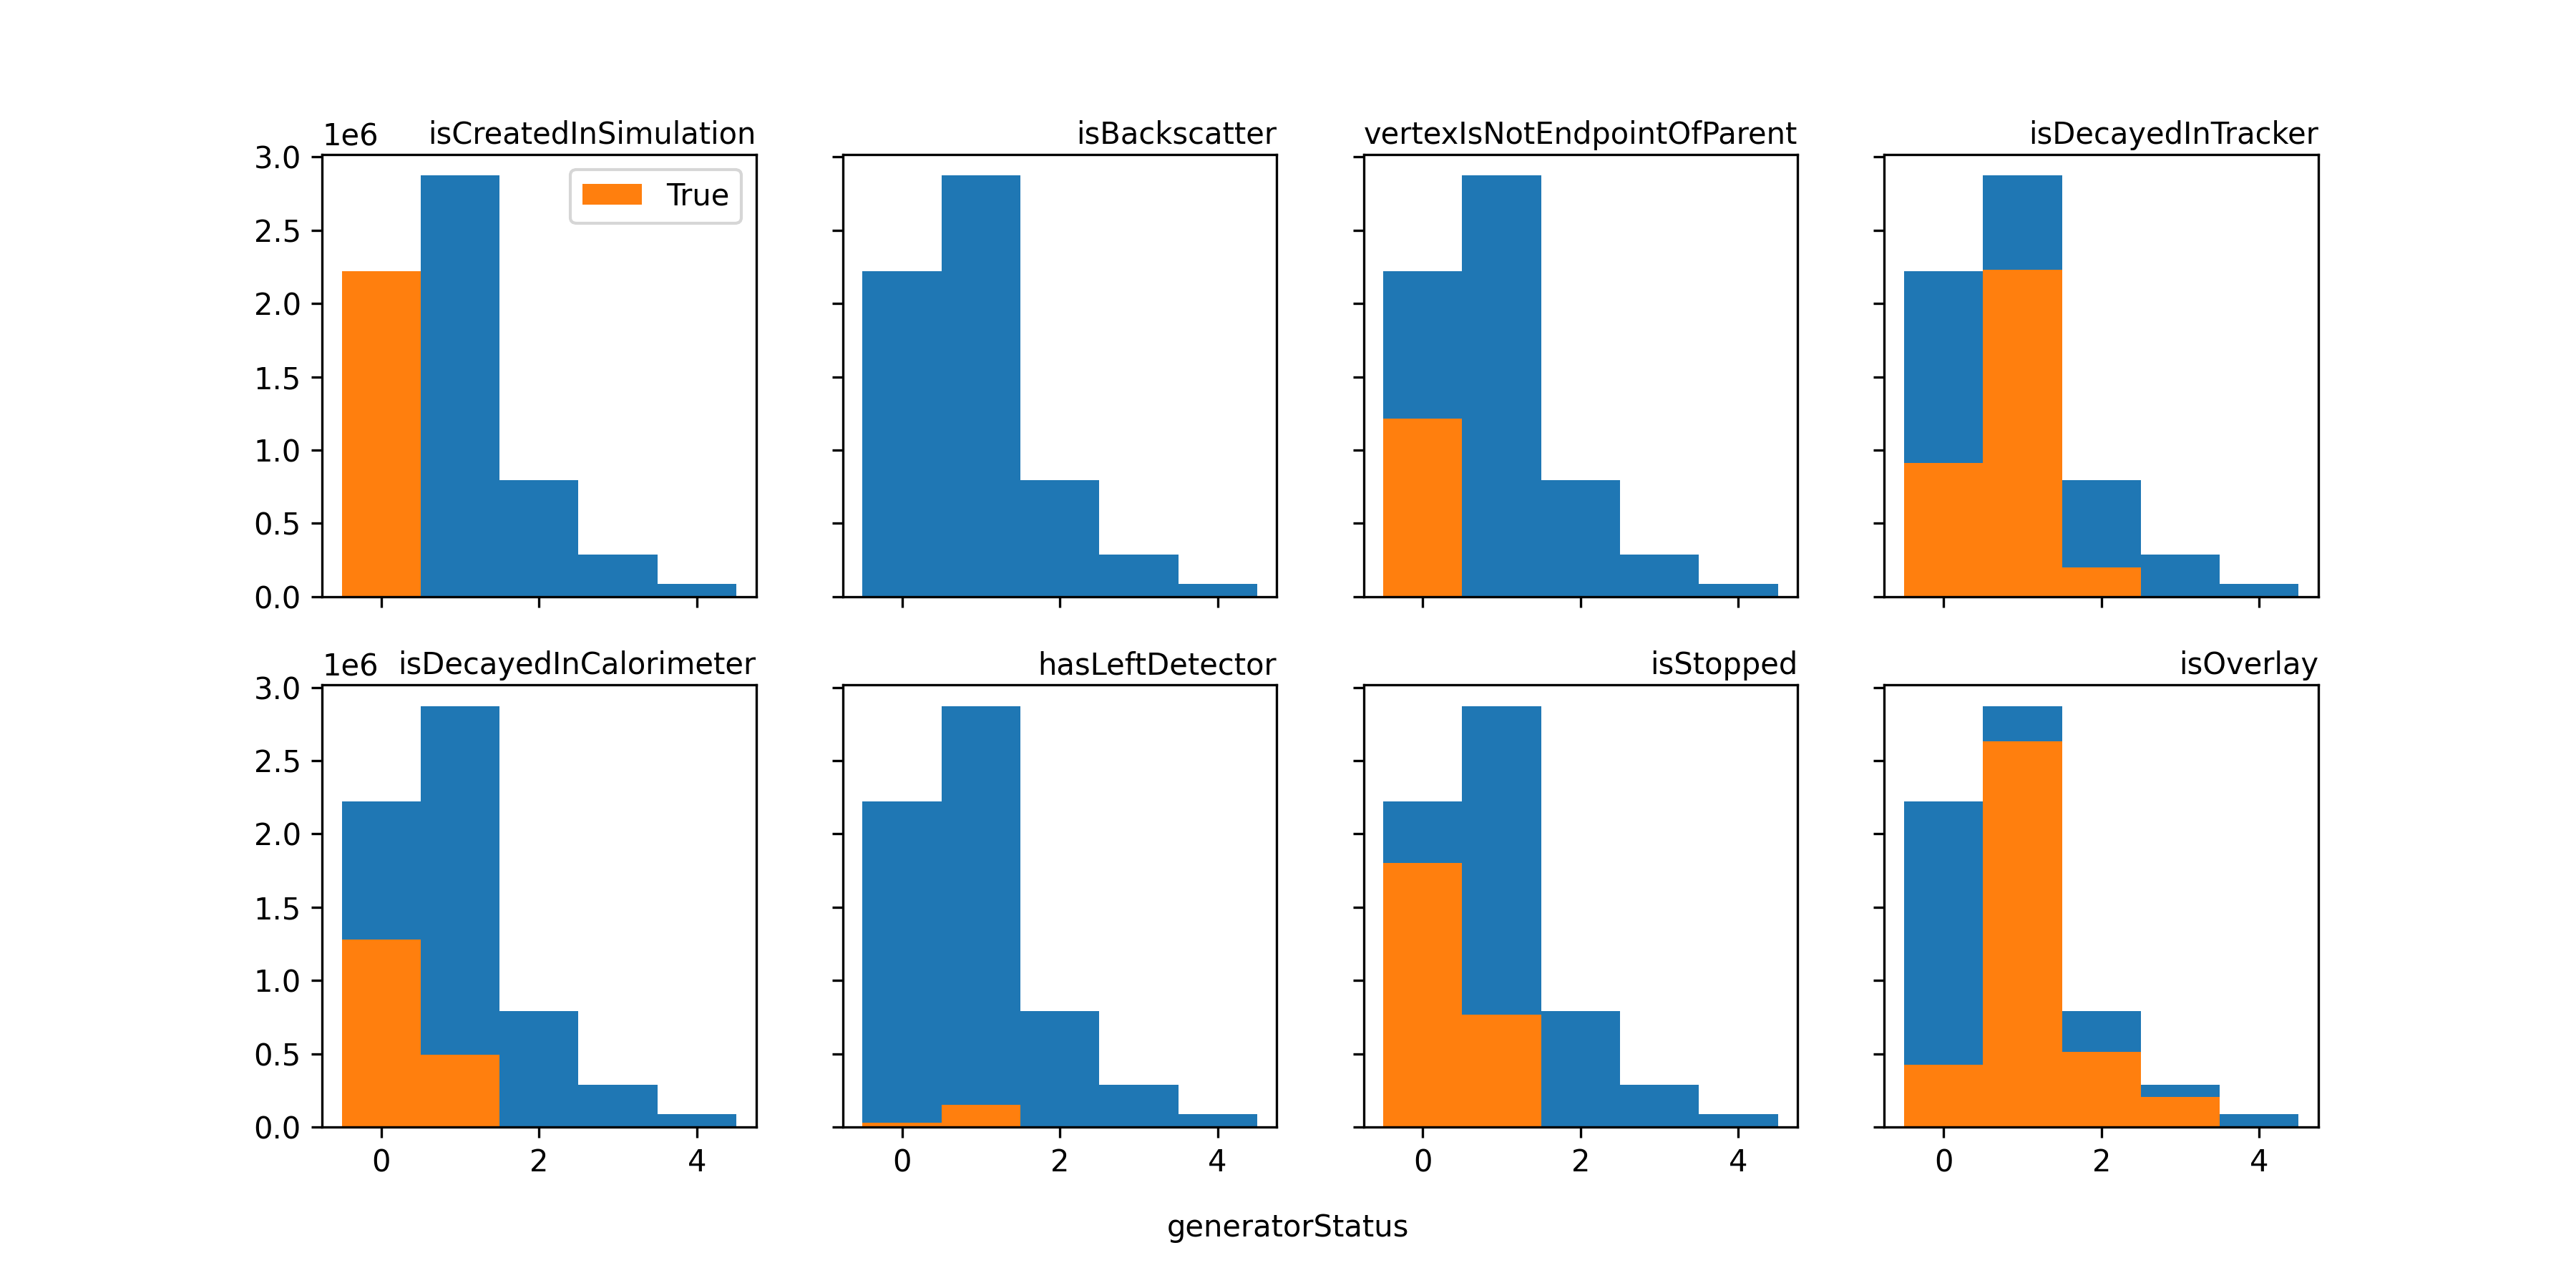

In [2]:
mc = add_simulation_info(mc)
fig, df_sim_status = plot_simulation_info(mc)

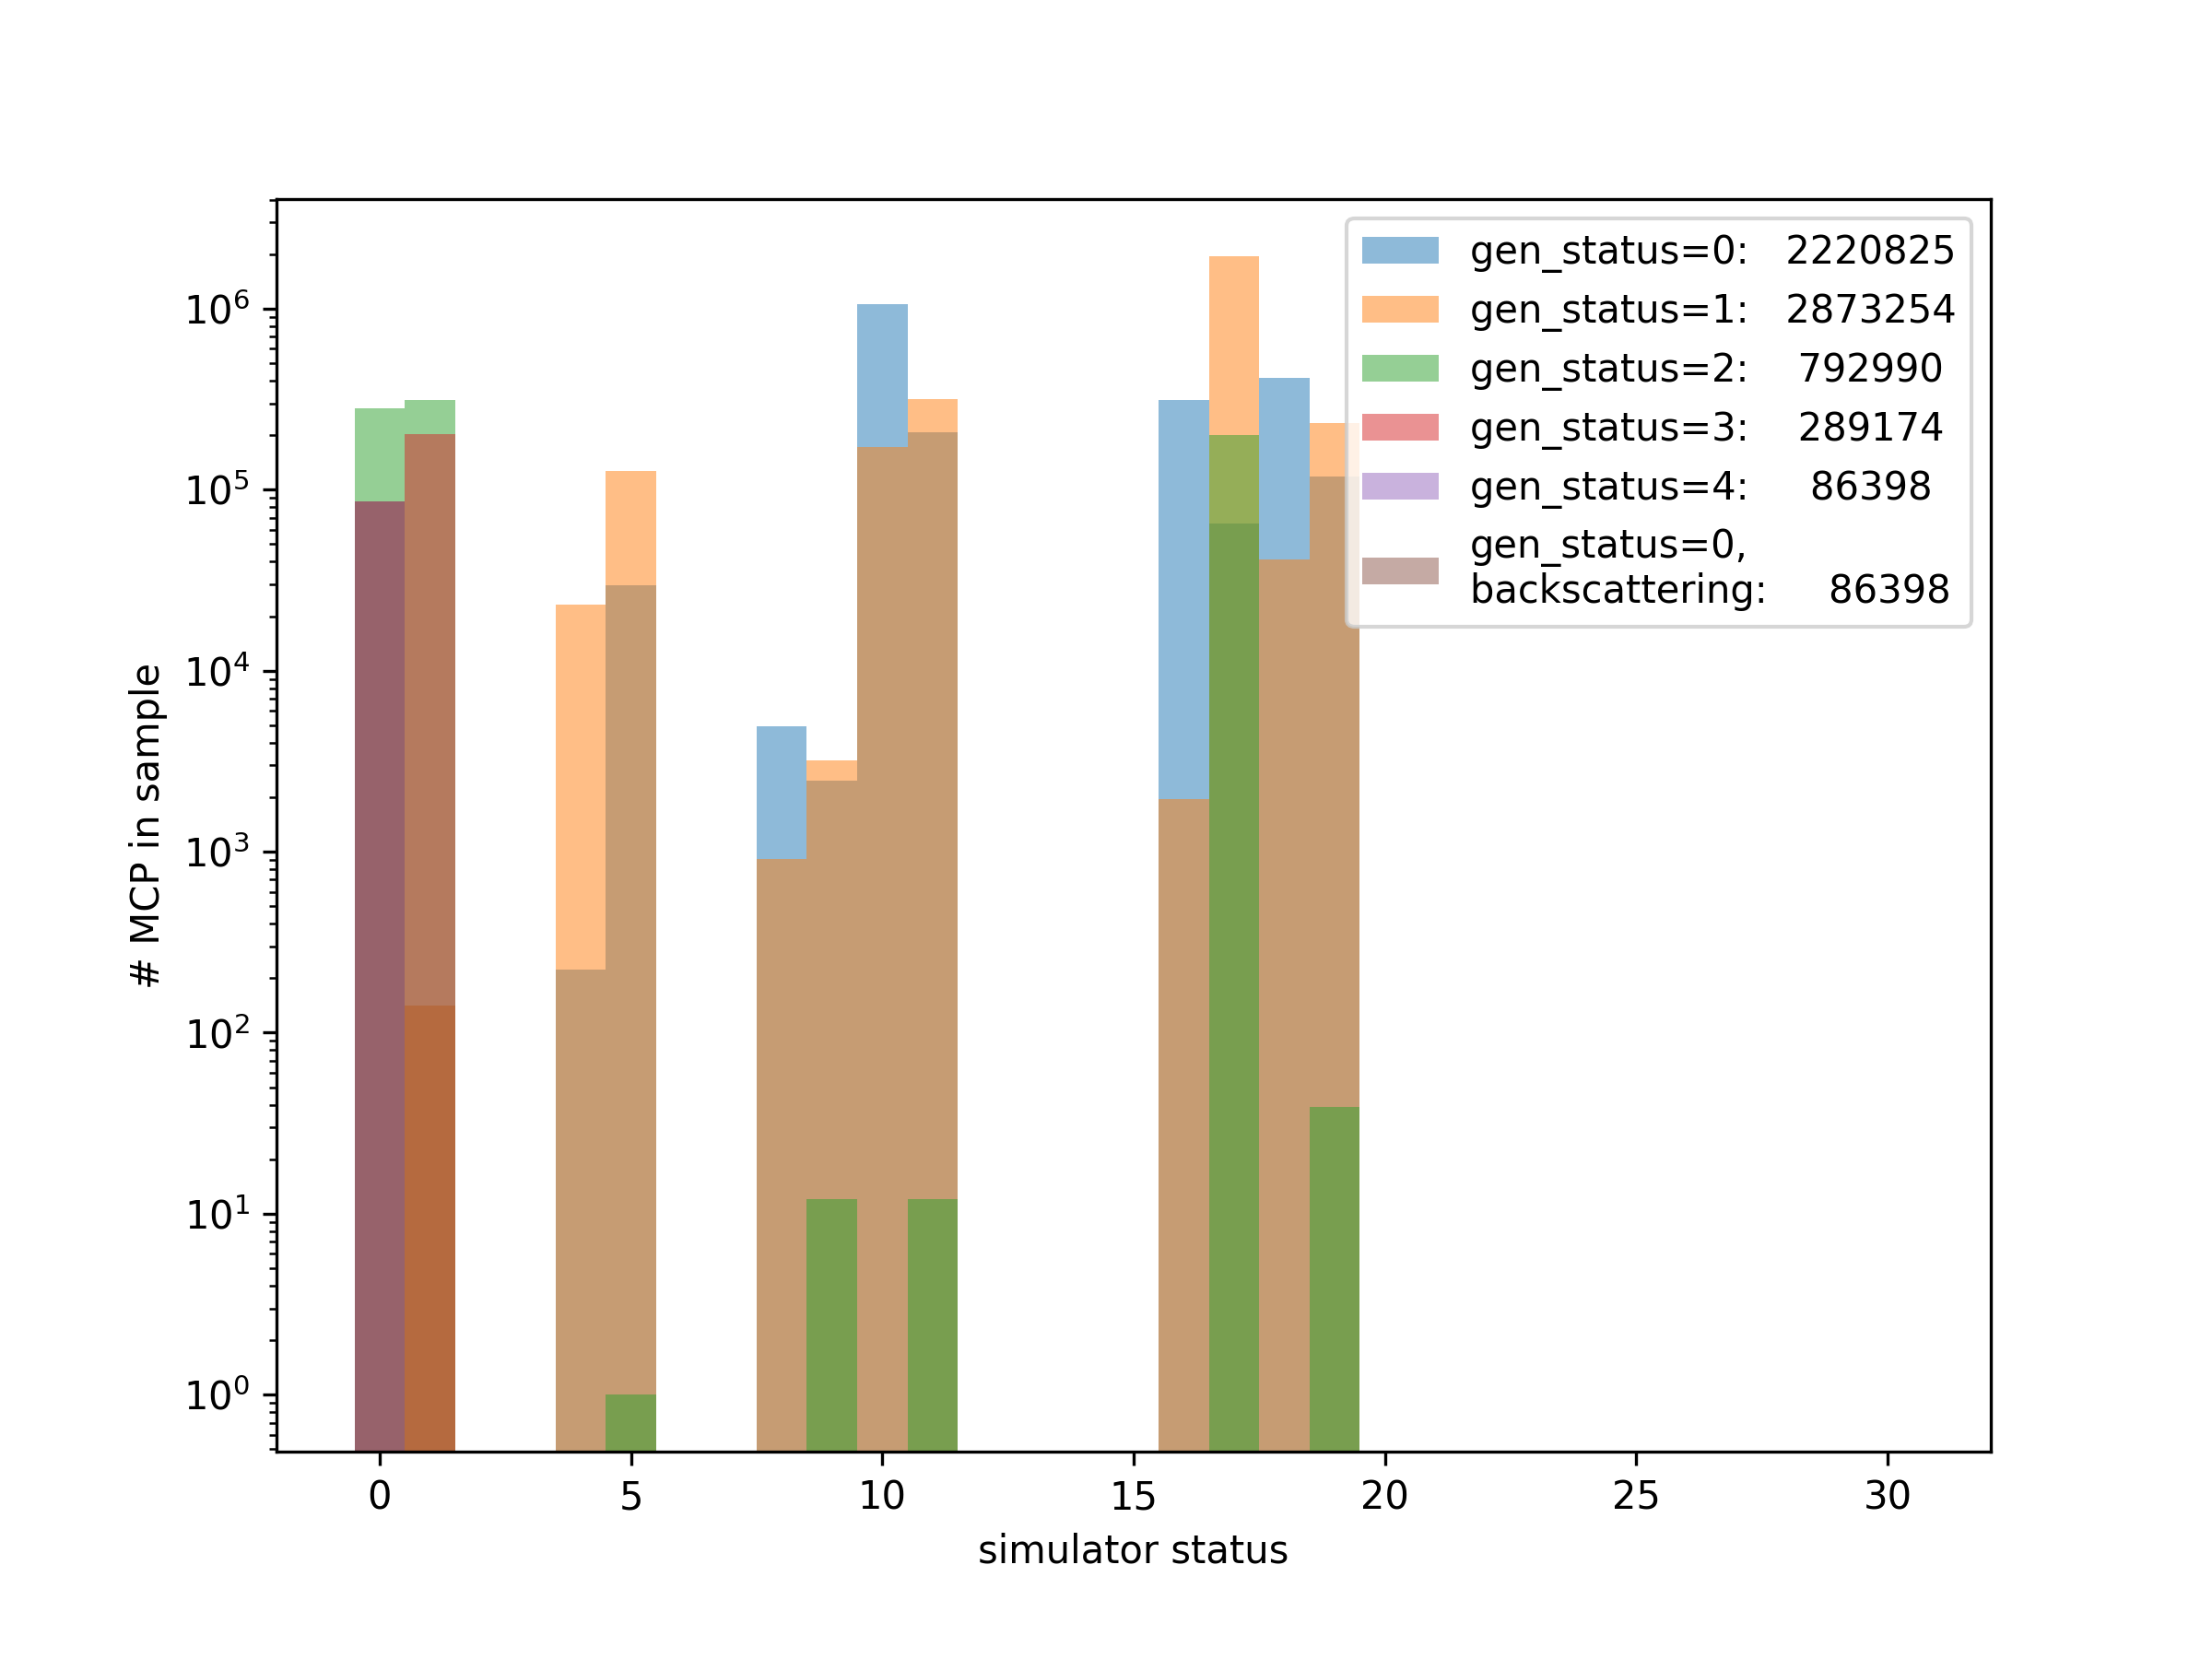

In [3]:
@load_or_make(["simulator_status_per_generator_status"])
def simulator_status_per_generator_status(mc):
    bins = np.arange(256) - 0.5
    bins = np.arange(32) - 0.5
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, gen_status in enumerate(range(6)):
        if i == 5:
            x = (mc[mc.mcgst == 4].mcsst + 2**32) // 2**23 - 256
            x = x % 32
            label_start = "gen_status=0,\nbackscattering"
        else:
            x = (mc[mc.mcgst == gen_status].mcsst + 2**32) // 2**23 - 256
            x = x % 32
            label_start = f"{gen_status=}"
        ax.hist(
            ak.flatten(x),
            bins=bins,
            label=label_start + f": {ak.sum(ak.num(x)):> 9}",
            alpha=0.5,
        )
    ax.set_yscale("log")
    ax.set_xlabel("simulator status")
    ax.set_ylabel("# MCP in sample")
    ax.legend()
    return (fig,)


# Don't care about vertex not being parent's endpoint. Mainly photons, but can be Si Isotopes, pions, ...
# Can only be one of isDecayedInTracker, isDecayedInCalorimeter, hasLeftDetector.
# If isStopped, must be isDecayedInTracker or isDecayedInCalorimeter.
simulator_status_per_generator_status(mc);

## What if `isCreatedInSimulation==True`?

Reminder: This is equivalent to `mcgst==3`